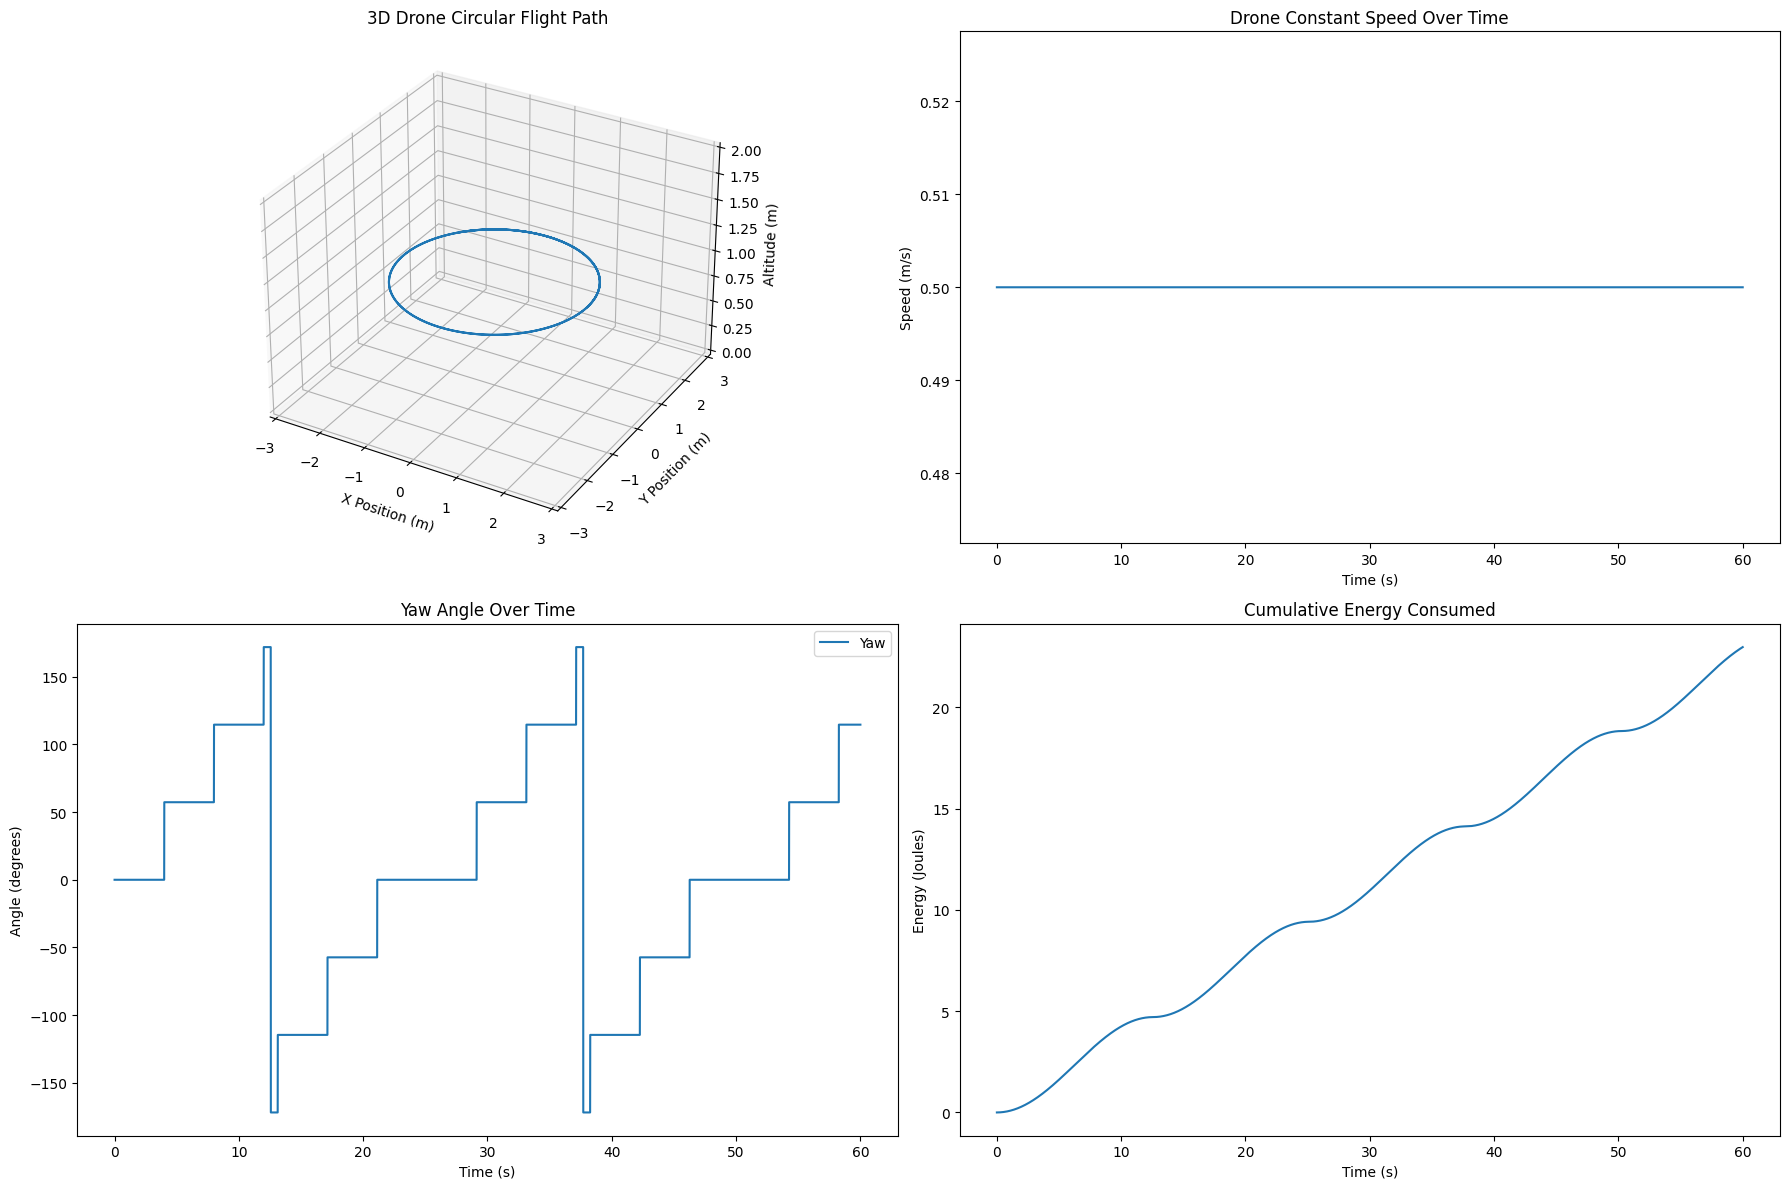

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class DroneDynamics:
    def __init__(self):
        self.mass = 0.73362  # Drone's mass in kilograms
        self.gravity = 9.81  # Gravitational acceleration in m/s^2
        self.radius = 2.0  # Desired radius of the circular flight path in meters
        self.altitude = 1.0  # Desired constant altitude in meters
        self.speed = 0.5  # Desired constant speed in m/s

        self.position = np.array([self.radius, 0, self.altitude])  # Initial position
        self.velocity = np.array([-self.speed, 0, 0])  # Initial velocity, tangential
        self.orientation = np.array([0, 0, 0])  # roll, pitch, yaw angles

    def update_physics(self, dt):
        # Calculate angular movement over the timestep
        angle_change = (self.speed / self.radius) * dt
        current_angle = np.arctan2(self.position[1], self.position[0]) + angle_change

        # Update position in the circular path
        self.position[0] = self.radius * np.cos(current_angle)
        self.position[1] = self.radius * np.sin(current_angle)
        self.position[2] = self.altitude

        # Update velocity to be tangential to the circle
        self.velocity[0] = -self.speed * np.sin(current_angle)
        self.velocity[1] = self.speed * np.cos(current_angle)
        self.velocity[2] = 0

        # Update orientation (yaw only)
        self.orientation[2] = current_angle

    def simulate(self, duration=60.0, dt=0.01):
        num_steps = int(duration / dt)
        positions = np.zeros((num_steps, 3))
        velocities = np.zeros((num_steps, 3))
        orientations = np.zeros((num_steps, 3))
        energy_consumed = np.zeros(num_steps)
        times = np.linspace(0, duration, num_steps)

        for i in range(num_steps):
            self.update_physics(dt)
            positions[i] = self.position
            velocities[i] = self.velocity
            orientations[i] = self.orientation
            energy_consumed[i] = self.calculate_energy(1, dt)  # Assume unit torque for simplicity

        return times, positions, velocities, orientations, energy_consumed

    def calculate_energy(self, tau, dt):
        # Example of energy calculation based on a constant efficiency
        return np.abs(tau * self.velocity[0] / 0.85) * dt

# Initialize and run the simulation
drone = DroneDynamics()
times, positions, velocities, orientations, energy = drone.simulate()

# Visualization
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.plot(positions[:, 0], positions[:, 1], positions[:, 2])
ax.set_title('3D Drone Circular Flight Path')
ax.set_xlabel('X Position (m)')
ax.set_ylabel('Y Position (m)')
ax.set_zlabel('Altitude (m)')
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([0, 2])

ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(times, np.linalg.norm(velocities, axis=1))
ax2.set_title('Drone Constant Speed Over Time')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Speed (m/s)')

ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(times, np.degrees(orientations[:, 2]), label='Yaw')
ax3.set_title('Yaw Angle Over Time')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Angle (degrees)')
ax3.legend()

ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(times, energy.cumsum())
ax4.set_title('Cumulative Energy Consumed')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Energy (Joules)')

plt.tight_layout()
plt.show()
